In [1]:
import os
os.environ["KERAS_BACKEND"] = "theano"

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import PIL
from PIL import Image, ImageFilter
import requests
from io import BytesIO

Using Theano backend.


In [13]:
batch_size = 128
nb_classes = 10
nb_epoch = 1000

# input image dimensions
img_rows, img_cols = 100, 100
# number of convolutional filters to use
nb_filters = 1
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (2, 2)

In [14]:
X_train_data = np.random.random((6,1, img_rows, img_cols))
Y_train_data = np.random.random((6,1, img_rows, img_cols))

with open("../../Environment/Informations/Content/Portraits/trainImages/images.txt") as f:
    infoFileContents = f.readlines()
    for l in range(len(infoFileContents)):
        infoLine = infoFileContents[l].lstrip().rstrip()
            
        response = requests.get(infoLine)
        trainInpImg = Image.open(BytesIO(response.content))
        trainInpGrayImg = trainInpImg.convert("L")
        trainInpGrayImg = trainInpGrayImg.resize((100,100), PIL.Image.ANTIALIAS)
        trainInpGreyImgArray = np.asarray(trainInpGrayImg, dtype=np.float32)
        Y_train_data[l,0,:,:] = trainInpGreyImgArray
        
        trainInpEdgeImg = trainInpImg.convert("L")
        trainInpEdgeImg = trainInpEdgeImg.resize((100,100), PIL.Image.ANTIALIAS)
        trainInpEdgeImg = trainInpEdgeImg.filter(ImageFilter.FIND_EDGES)

        trainInpEdgeImgArray = np.asarray(trainInpEdgeImg, dtype=np.float32)
        X_train_data[l,0,:,:] = trainInpEdgeImgArray

X_test_data = np.random.random((2,1, img_rows, img_cols))
Y_test_data = np.random.random((2,1, img_rows, img_cols))        

with open("../../Environment/Informations/Content/Portraits/testImages/images.txt") as f:
    infoFileContents = f.readlines()
    for l in range(len(infoFileContents)):
        infoLine = infoFileContents[l].lstrip().rstrip()
            
        response = requests.get(infoLine)
        trainInpImg = Image.open(BytesIO(response.content))
        trainInpGrayImg = trainInpImg.convert("L")
        trainInpGrayImg = trainInpGrayImg.resize((100,100), PIL.Image.ANTIALIAS)
        trainInpGreyImgArray = np.asarray(trainInpGrayImg, dtype=np.float32)
        Y_test_data[l,0,:,:] = trainInpGreyImgArray
        
        trainInpEdgeImg = trainInpImg.convert("L")
        trainInpEdgeImg = trainInpEdgeImg.resize((100,100), PIL.Image.ANTIALIAS)
        trainInpEdgeImg = trainInpEdgeImg.filter(ImageFilter.FIND_EDGES)
        trainInpEdgeImgArray = np.asarray(trainInpEdgeImg, dtype=np.float32)
        X_test_data[l,0,:,:] = trainInpEdgeImgArray
        

In [15]:
X_train_data = X_train_data.astype('float32')
X_train_data /= 255
print('X_train shape:', X_train_data.shape)
print(X_train_data.shape[0], 'train samples')
Y_train_data = Y_train_data.astype('float32')
Y_train_data /= 255
print('Y_train shape:', Y_train_data.shape)
print(Y_train_data.shape[0], 'train samples')

X_train shape: (6L, 1L, 100L, 100L)
6 train samples
Y_train shape: (6L, 1L, 100L, 100L)
6 train samples


In [16]:
if K.image_dim_ordering() == 'th':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

In [17]:
model = Sequential()

model.add(Convolution2D(nb_filters*100, kernel_size[0], kernel_size[1],
                        border_mode='same',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters*50, kernel_size[0], kernel_size[1],
                         border_mode='same',
                         input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                         border_mode='same',
                         input_shape=input_shape))
model.add(Activation('relu'))

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [19]:
model.fit(X_train_data, Y_train_data, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test_data, Y_test_data))

Train on 6 samples, validate on 2 samples
Epoch 1/1000
6/6 [==============================] - 0s - loss: 3.1888 - val_loss: -180.4848
Epoch 2/1000
6/6 [==============================] - 0s - loss: 1.8623 - val_loss: -636.4697
Epoch 3/1000
6/6 [==============================] - 0s - loss: 1.5710 - val_loss: -1058.7136
Epoch 4/1000
6/6 [==============================] - 0s - loss: 1.3477 - val_loss: -1612.6957
Epoch 5/1000
6/6 [==============================] - 0s - loss: 1.1993 - val_loss: -1815.4517
Epoch 6/1000
6/6 [==============================] - 0s - loss: 1.1491 - val_loss: -1903.7407
Epoch 7/1000
6/6 [==============================] - 0s - loss: 1.1242 - val_loss: -1989.1265
Epoch 8/1000
6/6 [==============================] - 0s - loss: 1.1010 - val_loss: -2063.9404
Epoch 9/1000
6/6 [==============================] - 0s - loss: 1.0794 - val_loss: -2137.1406
Epoch 10/1000
6/6 [==============================] - 0s - loss: 1.0588 - val_loss: -2208.3271
Epoch 11/1000
6/6 [==========

In [20]:
score = model.evaluate(X_train_data, Y_train_data, verbose=0)
print('Test score:', score)
print('Test accuracy:', score)

Test score: 0.583018898964
Test accuracy: 0.583018898964


In [21]:
pred_data = model.predict(X_test_data)

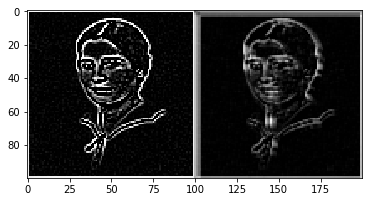

In [22]:
plot_image = np.concatenate((X_test_data[0][0]*255, pred_data[0][0]*255), axis=1)
plt.imshow(plot_image, cmap = cm.Greys_r)
plt.show()

In [ ]:
trainInpGrayImg

In [ ]:
trainInpEdgeImg

In [ ]:
prdImg = Image.fromarray(pred_data[0][0], 'L')
prdImg